In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import json
db = json.load(open('/home/kyohei/pydata-book/ch07/foods-2011-10-03.json'))

In [3]:
len(db)

6636

In [4]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [5]:
db[0]['nutrients'][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

In [8]:
import pandas as pd
nutrients = pd.DataFrame(db[0]['nutrients'])

In [10]:
nutrients.head()

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00


In [12]:
info_keys = ['description','group','id','manufactuer']
info = pd.DataFrame(db,columns=info_keys)

In [13]:
info.head()

,description,group,id,manufactuer
0,"Cheese, caraway",Dairy and Egg Products,1008,NaN
1,"Cheese, cheddar",Dairy and Egg Products,1009,NaN
2,"Cheese, edam",Dairy and Egg Products,1018,NaN
3,"Cheese, feta",Dairy and Egg Products,1019,NaN
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,NaN


In [14]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description    6636 non-null object
group          6636 non-null object
id             6636 non-null int64
manufactuer    0 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 207.4+ KB


In [16]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [18]:
nutrients = []

for data in db:
    frame = pd.DataFrame(data['nutrients'])
    frame['id'] = data['id']
    nutrients.append(frame)
    
nutrients = pd.concat(nutrients,ignore_index=True)

In [20]:
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [22]:
nutrients.duplicated().sum()

14179

In [24]:
nutrients = nutrients.drop_duplicates()

In [26]:
nutrients.duplicated().sum()

0

In [28]:
col_mapping = {'description':'food',
              'group':'fgroup'}

info = info.rename(columns=col_mapping,copy=False)

In [29]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food           6636 non-null object
fgroup         6636 non-null object
id             6636 non-null int64
manufactuer    0 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 207.4+ KB


In [39]:
col_mapping = {'description':'nutrient',
              'group':'nutgroup'}

nutrients = nutrients.rename(columns=col_mapping,copy=False)

In [40]:
nutrietns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
nutrient    375176 non-null object
nutgroup    375176 non-null object
units       375176 non-null object
value       375176 non-null float64
id          375176 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [41]:
ndata = pd.merge(info,nutrients,on='id',how='outer')

In [42]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
food           375176 non-null object
fgroup         375176 non-null object
id             375176 non-null int64
manufactuer    0 non-null float64
nutrient       375176 non-null object
nutgroup       375176 non-null object
units          375176 non-null object
value          375176 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 25.8+ MB


In [43]:
ndata.ix[30000]

food           Soup, tomato bisque, canned, condensed
fgroup                     Soups, Sauces, and Gravies
id                                               6158
manufactuer                                       NaN
nutrient                                      Glycine
nutgroup                                  Amino Acids
units                                               g
value                                            0.04
Name: 30000, dtype: object

In [44]:
result = ndata.groupby(['nutrient','fgroup']).value.quantile(0.5)

In [47]:
result.head()

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
Name: value, dtype: float64

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


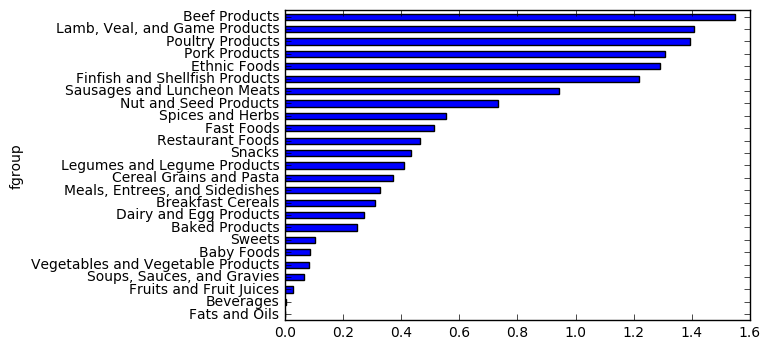

In [48]:
result['Alanine'].order().plot(kind='barh')

In [50]:
ndata.value.idxmax()

18475

In [51]:
by_nutrietns = ndata.groupby(['nutgroup','nutrient'])
get_maximum = lambda x: x.xs(x.value.idxmax())

In [52]:
max_foods = by_nutrietns.apply(get_maximum)[['value','food']]
max_foods.food = max_foods.food.str[:50]

In [55]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 